In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import seaborn as sns
from IPython.display import display

### Load data

In [120]:
df = pd.read_csv('data/weather_cleaned01.csv')
display(df)

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,rain,0.577778,-4.050000,0.89,17.1143,140.0,9.9820,1016.66
1,rain,1.161111,-3.238889,0.85,16.6152,139.0,9.9015,1016.15
2,rain,1.666667,-3.155556,0.82,20.2538,140.0,9.9015,1015.87
3,rain,1.711111,-2.194444,0.82,14.4900,140.0,9.9015,1015.56
4,rain,1.183333,-2.744444,0.86,13.9426,134.0,9.9015,1014.98
...,...,...,...,...,...,...,...,...
95907,rain,0.488889,-2.644444,0.86,9.7566,167.0,8.0178,1020.03
95908,rain,0.072222,-3.050000,0.88,9.4185,169.0,7.2450,1020.27
95909,snow,-0.233333,-3.377778,0.89,9.2736,175.0,9.5795,1020.50
95910,snow,-0.472222,-3.644444,0.91,9.2414,182.0,8.4042,1020.65


In [54]:
print(display(df.describe()))

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,94601.000000,94601.000000,94601.000000,94601.000000,94601.000000,94601.000000,94601.000000
mean,11.960713,10.889394,0.735083,10.779948,187.441888,10.398129,1016.798963
std,9.557532,10.698426,0.195539,6.896769,107.393743,4.167691,7.768542
min,-21.822222,-27.716667,0.120000,0.000000,0.000000,0.000000,973.780000
25%,4.672222,2.305556,0.600000,5.796000,116.000000,8.420300,1012.110000
50%,12.061111,12.061111,0.780000,9.917600,180.000000,10.046400,1016.530000
75%,18.855556,18.855556,0.890000,14.103600,290.000000,14.908600,1021.130000
max,39.905556,39.344444,1.000000,55.931400,359.000000,16.100000,1046.380000


None


In [42]:
df = df.drop(columns=['Precip Type'])

In [43]:
display(df)

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,0.577778,-4.050000,0.89,17.1143,140.0,9.9820,1016.66
1,1.161111,-3.238889,0.85,16.6152,139.0,9.9015,1016.15
2,1.666667,-3.155556,0.82,20.2538,140.0,9.9015,1015.87
3,1.711111,-2.194444,0.82,14.4900,140.0,9.9015,1015.56
4,1.183333,-2.744444,0.86,13.9426,134.0,9.9015,1014.98
...,...,...,...,...,...,...,...
95907,0.488889,-2.644444,0.86,9.7566,167.0,8.0178,1020.03
95908,0.072222,-3.050000,0.88,9.4185,169.0,7.2450,1020.27
95909,-0.233333,-3.377778,0.89,9.2736,175.0,9.5795,1020.50
95910,-0.472222,-3.644444,0.91,9.2414,182.0,8.4042,1020.65


<AxesSubplot:>

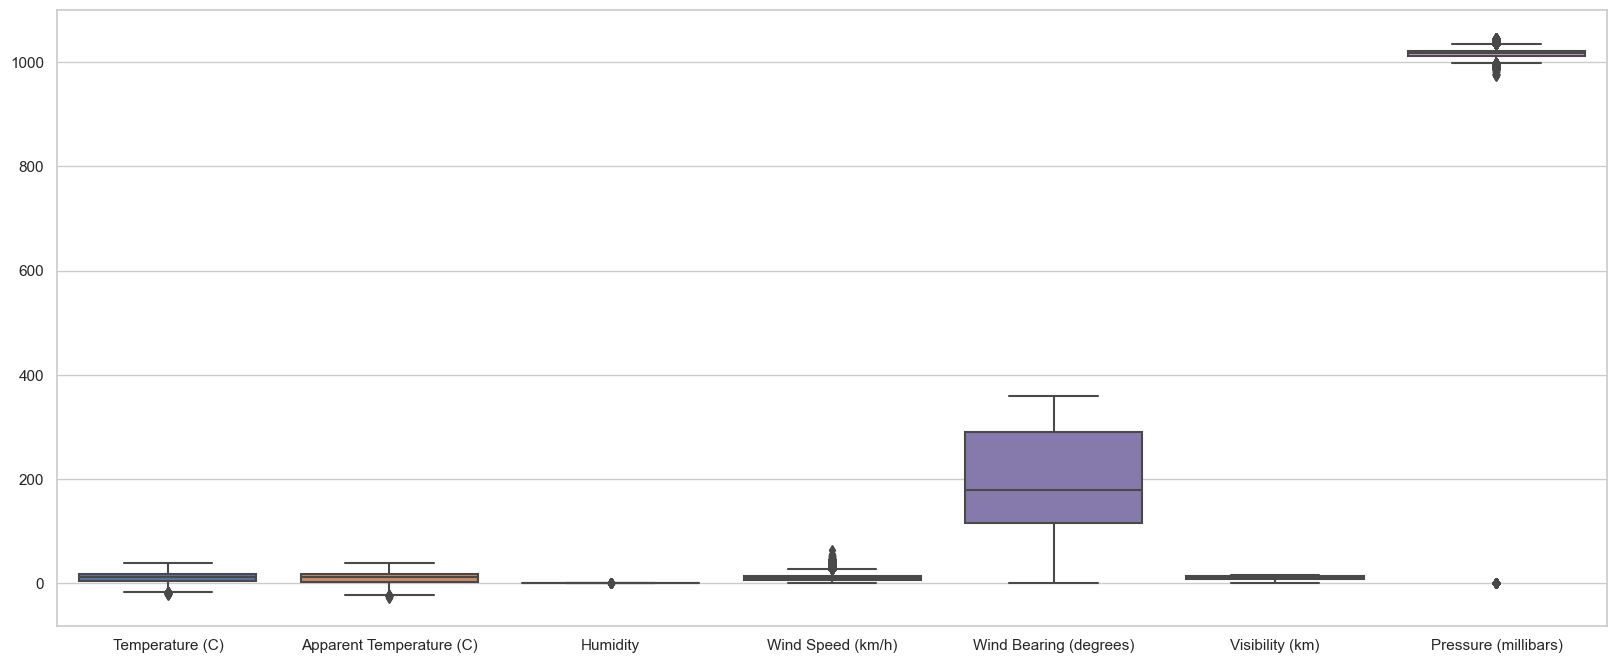

In [31]:
sns.set(rc={'figure.figsize':(20,8)}, style='whitegrid')
sns.boxplot(data=df)

<AxesSubplot:>

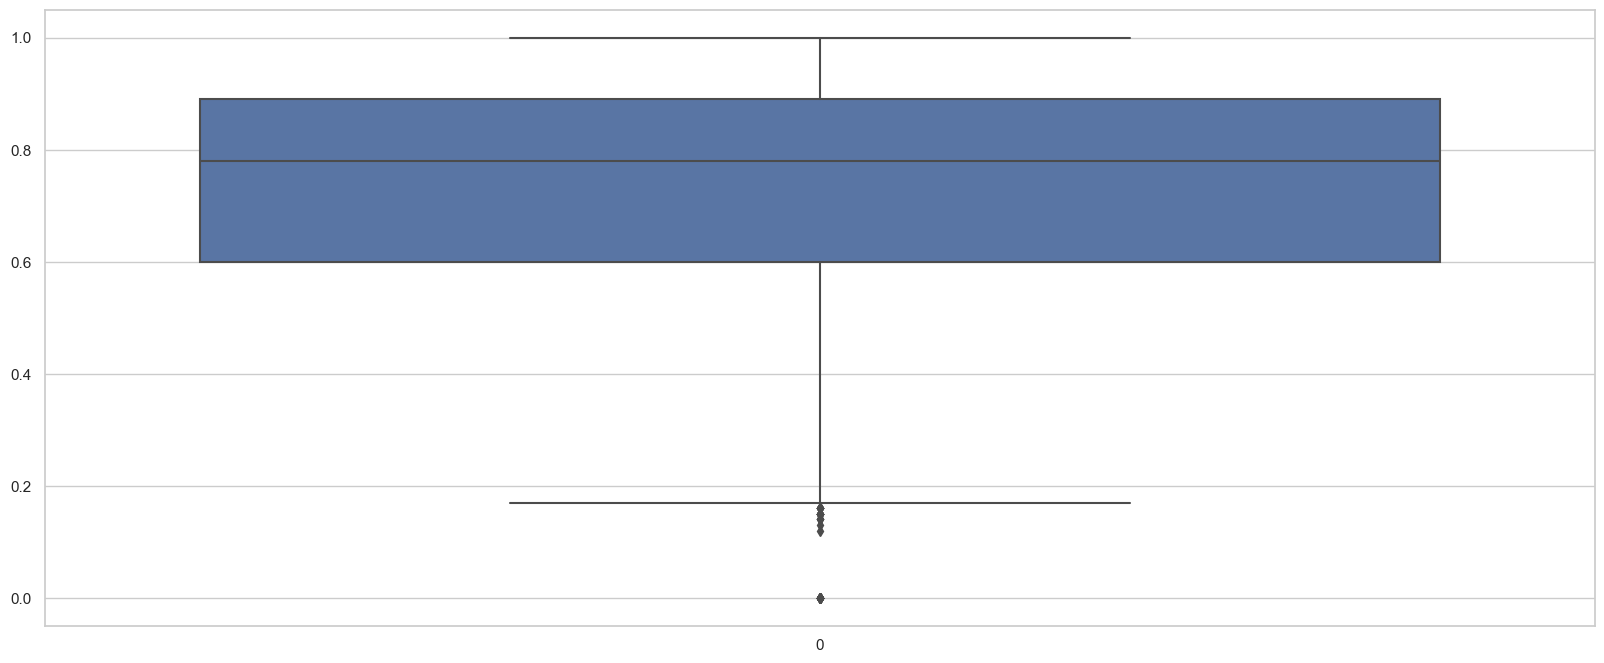

In [35]:
sns.boxplot(data=df['Humidity'])

<AxesSubplot:>

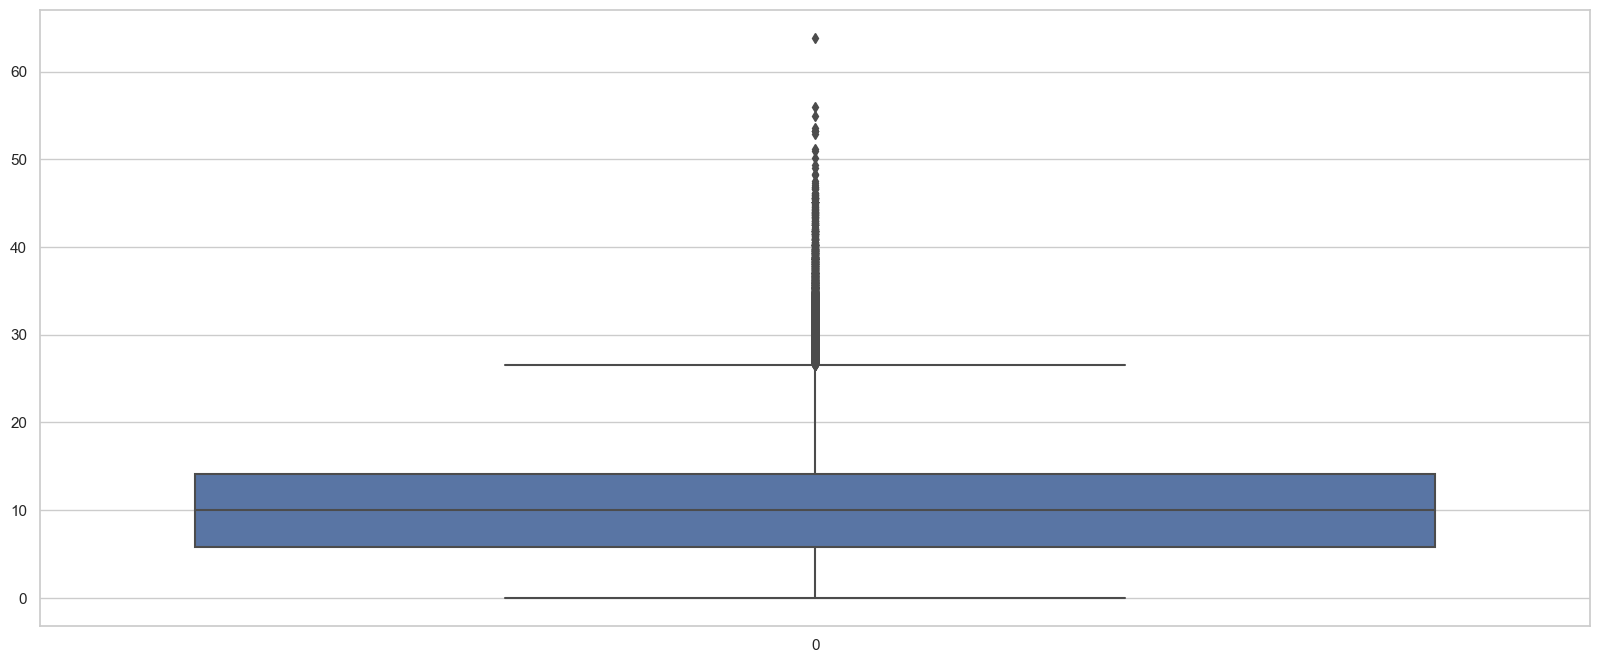

In [36]:
sns.boxplot(data=df['Wind Speed (km/h)'])

<AxesSubplot:>

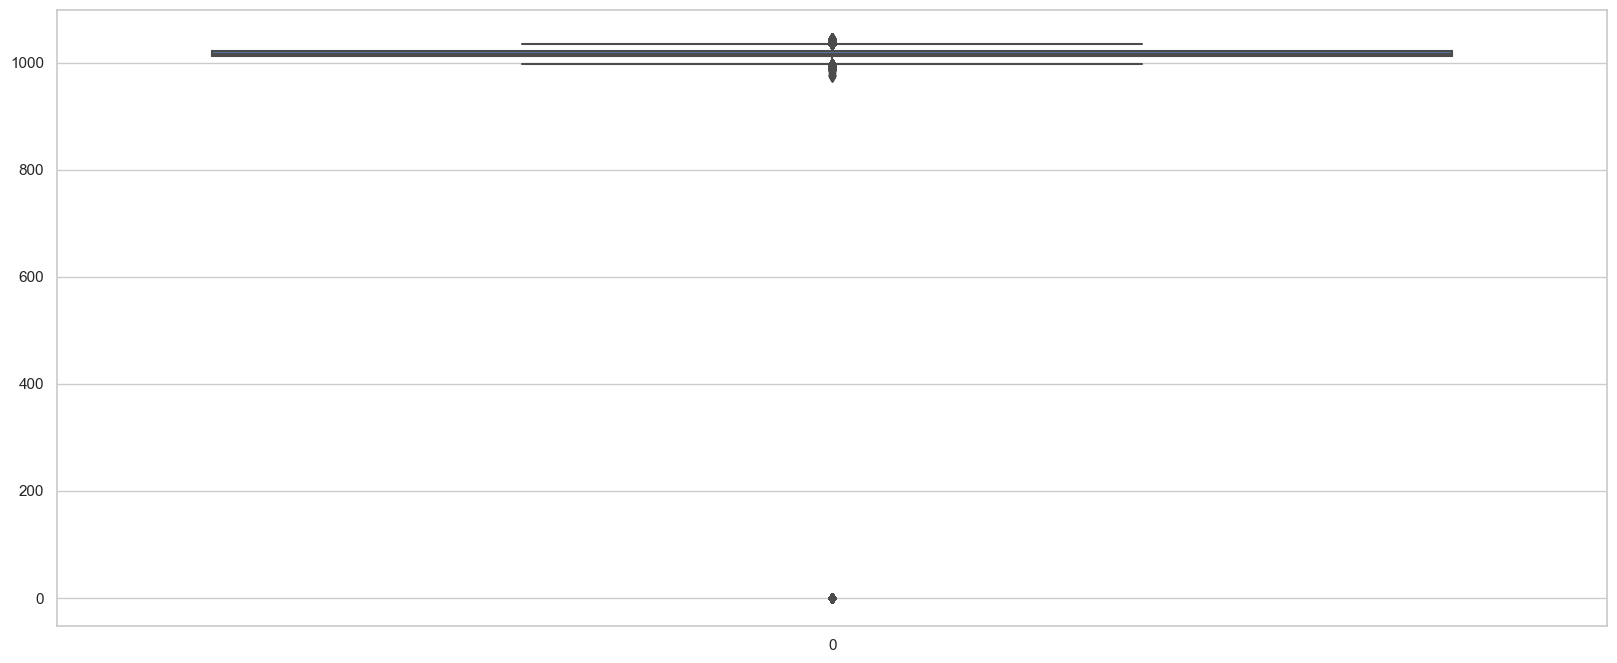

In [37]:
sns.boxplot(data=df['Pressure (millibars)'])

In [44]:
df = df[df['Humidity'] != 0.0]
df = df[df['Wind Speed (km/h)'] <= 60]
df = df[df['Pressure (millibars)'] > 0]
df.reset_index(inplace=True, drop=True)
print(df.shape)

(94601, 7)


In [47]:
df.columns

Index(['Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Pressure (millibars)'],
      dtype='object')

#### Identify screwness

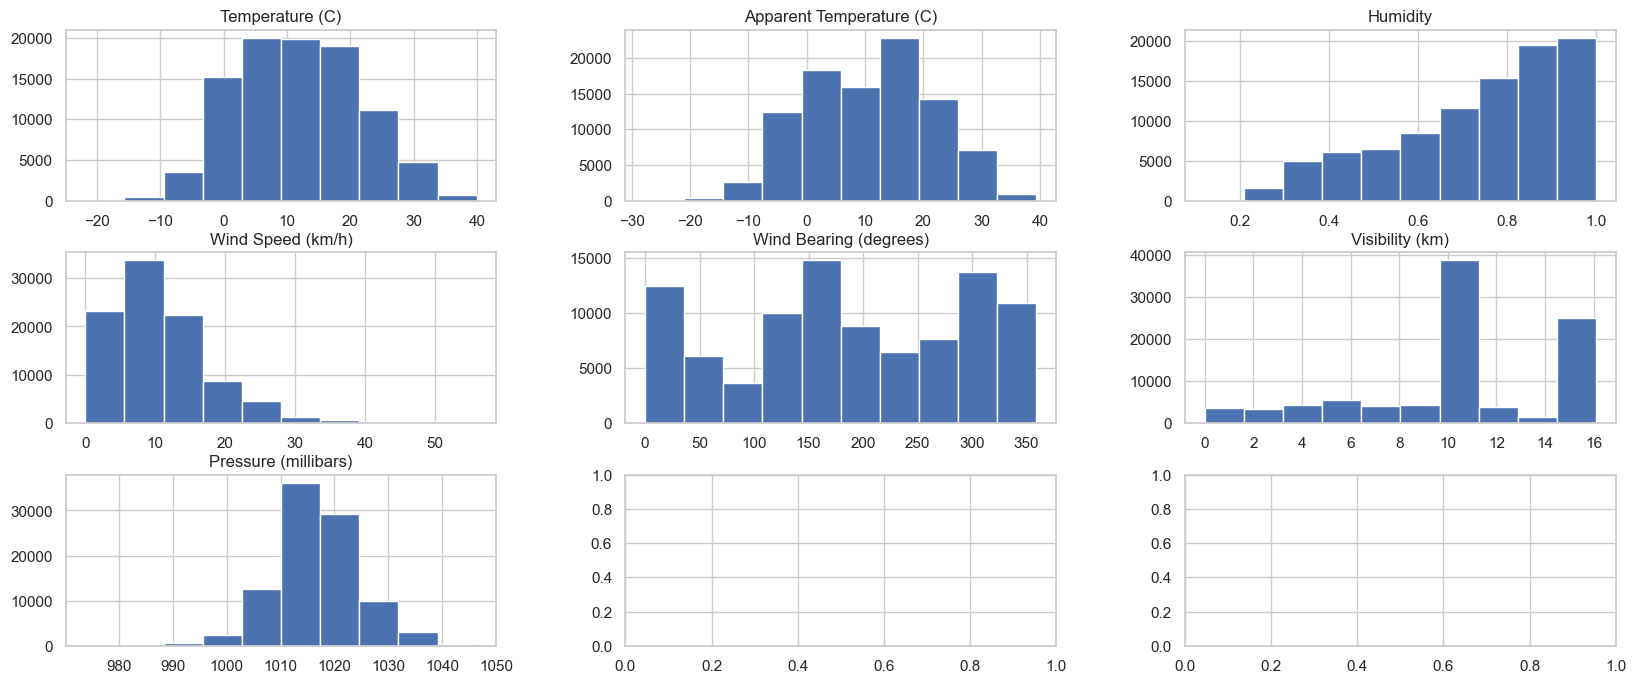

In [48]:
fig, axes = plt.subplots(3,3)
for i, column in enumerate(df.columns):
    temp_df = pd.DataFrame(df[column], columns=[column])
    temp_df.hist(ax=axes[int(i/3)][i%3])
plt.show()

- ‘Humidity’ data set is left skewed.
- ‘Wind Speed’ data set is right skewed.

In [57]:
from sklearn.preprocessing import FunctionTransformer

# squre root transformation for 'Wind Speed'
sqrt_transformer = FunctionTransformer(np.sqrt, validate=True)
data_transformed = sqrt_transformer.transform(df[['Wind Speed (km/h)']])
df['Wind Speed (km/h)'] = data_transformed
# power transformation with power of 2 for 'Humidity'
power_transformer = FunctionTransformer(lambda x: x**2, validate=True)
data_transformed = power_transformer.transform(df[['Humidity']])
df['Humidity'] = data_transformed

C:\Users\jjmat\OneDrive\Meins\Promotion\Lehre\TagDerInformatik\WeatherPrediction\venv\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(
C:\Users\jjmat\OneDrive\Meins\Promotion\Lehre\TagDerInformatik\WeatherPrediction\venv\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


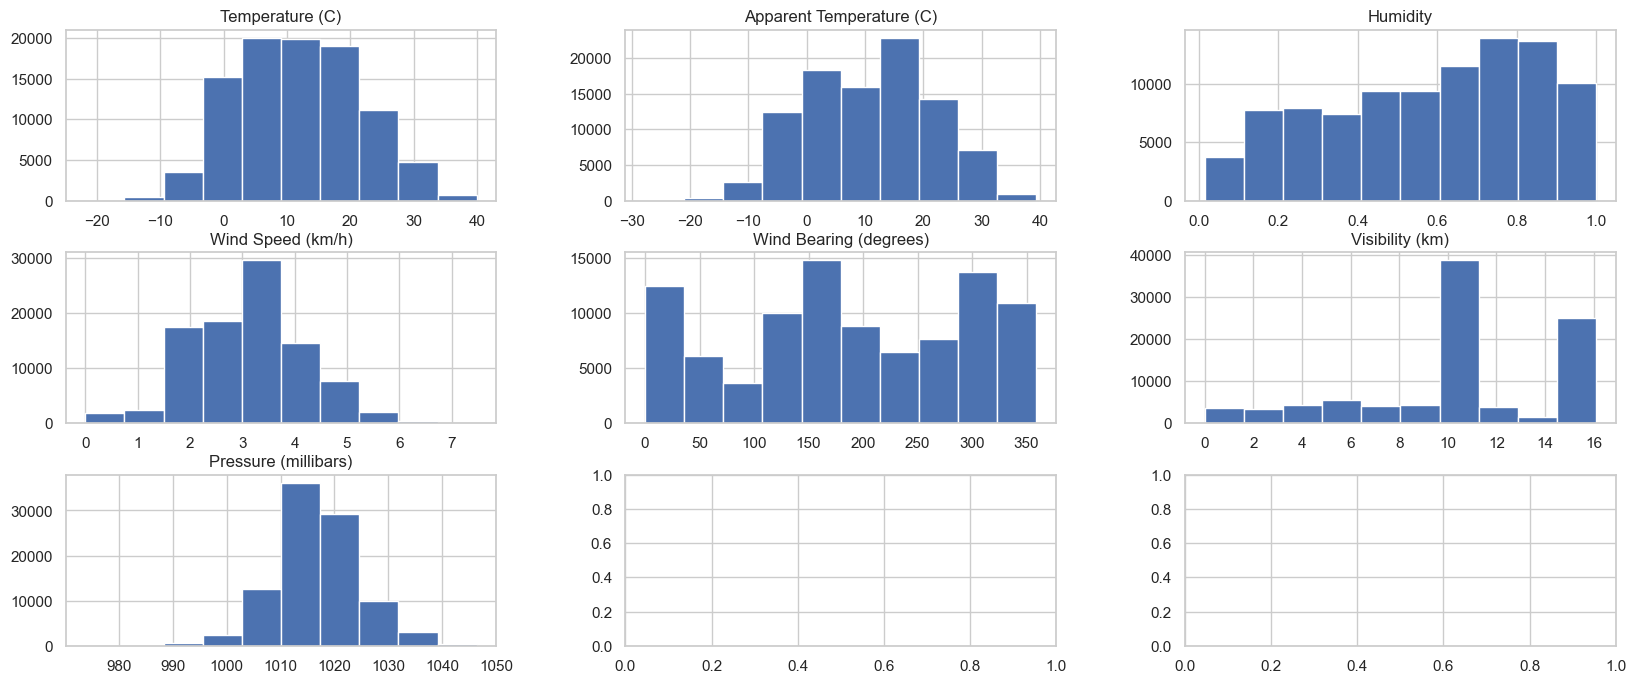

In [58]:
fig, axes = plt.subplots(3,3)
for i, column in enumerate(df.columns):
    temp_df = pd.DataFrame(df[column], columns=[column])
    temp_df.hist(ax=axes[int(i/3)][i%3])
plt.show()

In [128]:
df.to_csv("data/weather_cleaned02.csv", index=False)

### Split data into train and test
we drop "Apperent Temperature" on the testing, since we want to predict those values.

In [63]:
from sklearn.model_selection import train_test_split

df_data = df.drop('Apparent Temperature (C)', axis=1)
df_target = pd.DataFrame(df['Apparent Temperature (C)'], columns=['Apparent Temperature (C)'])
x_train, x_test, y_train, y_test = train_test_split(df_data, df_target, test_size=0.2, random_state=42)

In [125]:
from sklearn.preprocessing import StandardScaler
# for feature data
scaler_train = StandardScaler()
scaler_train.fit(x_train)
x_train_scaled = scaler_train.transform(x_train)
x_test_scaled = scaler_train.transform(x_test)
df_x_train_standardized = pd.DataFrame(x_train_scaled, columns = x_train.columns)
df_x_test_standardized = pd.DataFrame(x_test_scaled, columns = x_train.columns)
# for target data
scaler_target = StandardScaler()
scaler_target.fit(y_train)
y_train_scaled = scaler_target.transform(y_train)
y_test_scaled = scaler_target.transform(y_test)
df_y_train_standardized = pd.DataFrame(y_train_scaled, columns = ['Apparent Temperature (C)'])
df_y_test_standardized = pd.DataFrame(y_test_scaled, columns = ['Apparent Temperature (C)'])

<AxesSubplot:>

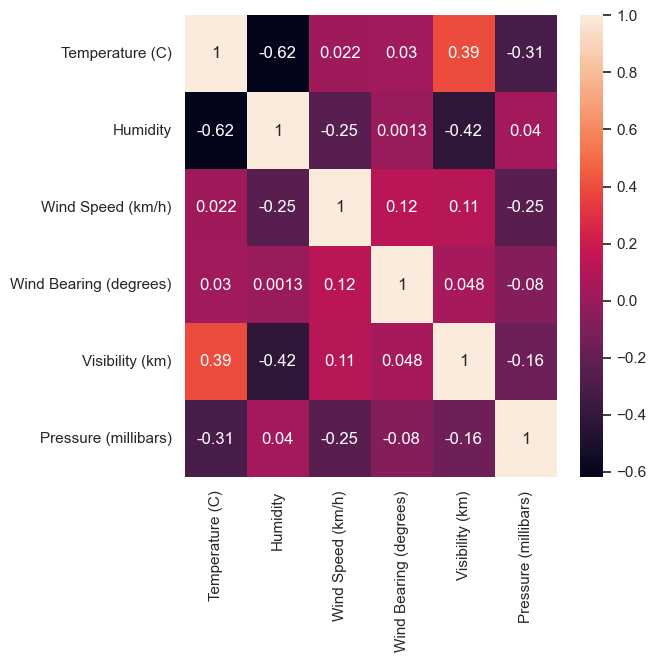

In [126]:
sns.set(rc={'figure.figsize':(6,6)})
sns.heatmap(df_x_train_standardized.corr(), annot=True)

In [88]:
from sklearn import linear_model

lm = linear_model.LinearRegression()
model = lm.fit(x_train, y_train)

In [89]:
predictions = lm.predict(x_train)
y_train_pred = pd.DataFrame(predictions, columns=['Predicted Apparent Temperature (C)'])

In [127]:
display(y_train_pred)

,Predicted Apparent Temperature (C)
0,11.581850
1,3.334123
2,23.148505
3,-6.352204
4,18.115472
...,...
75675,21.136324
75676,20.305149
75677,4.884039
75678,-13.561599


In [91]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Mean Squred Error
mse = mean_squared_error(y_train, y_train_pred)
print('Mean squared error(Train) :', round(mse, 4))

# Root Mean Squared Error
rmsq = sqrt(mean_squared_error(y_train, y_train_pred))
print('Root mean squared error(Train) :', round(rmsq, 4))

# Accuracy
score = lm.score(x_train, y_train)
print('Explained variance of the predictions(Train) :', round(score * 100, 4))

Mean squared error(Train) : 1.1297
Root mean squared error(Train) : 1.0629
Explained variance of the predictions(Train) : 99.0145


In [94]:
predictions = lm.predict(x_test)
y_pred = pd.DataFrame(predictions, columns=['Predicted Apparent Temperature (C)'])
# Mean Squred Error
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error(Testing) :', round(mse, 4))

# Root Mean Squared Error
rmsq = sqrt(mean_squared_error(y_test, y_pred))
print('Root mean squared error(Testing) :', round(rmsq, 4))

# Accuracy
score = lm.score(x_test, y_test)
print('Explained variance of the predictions(Testing) :', round(score * 100, 4))

Mean squared error(Testing) : 1.1376
Root mean squared error(Testing) : 1.0666
Explained variance of the predictions(Testing) : 98.9998


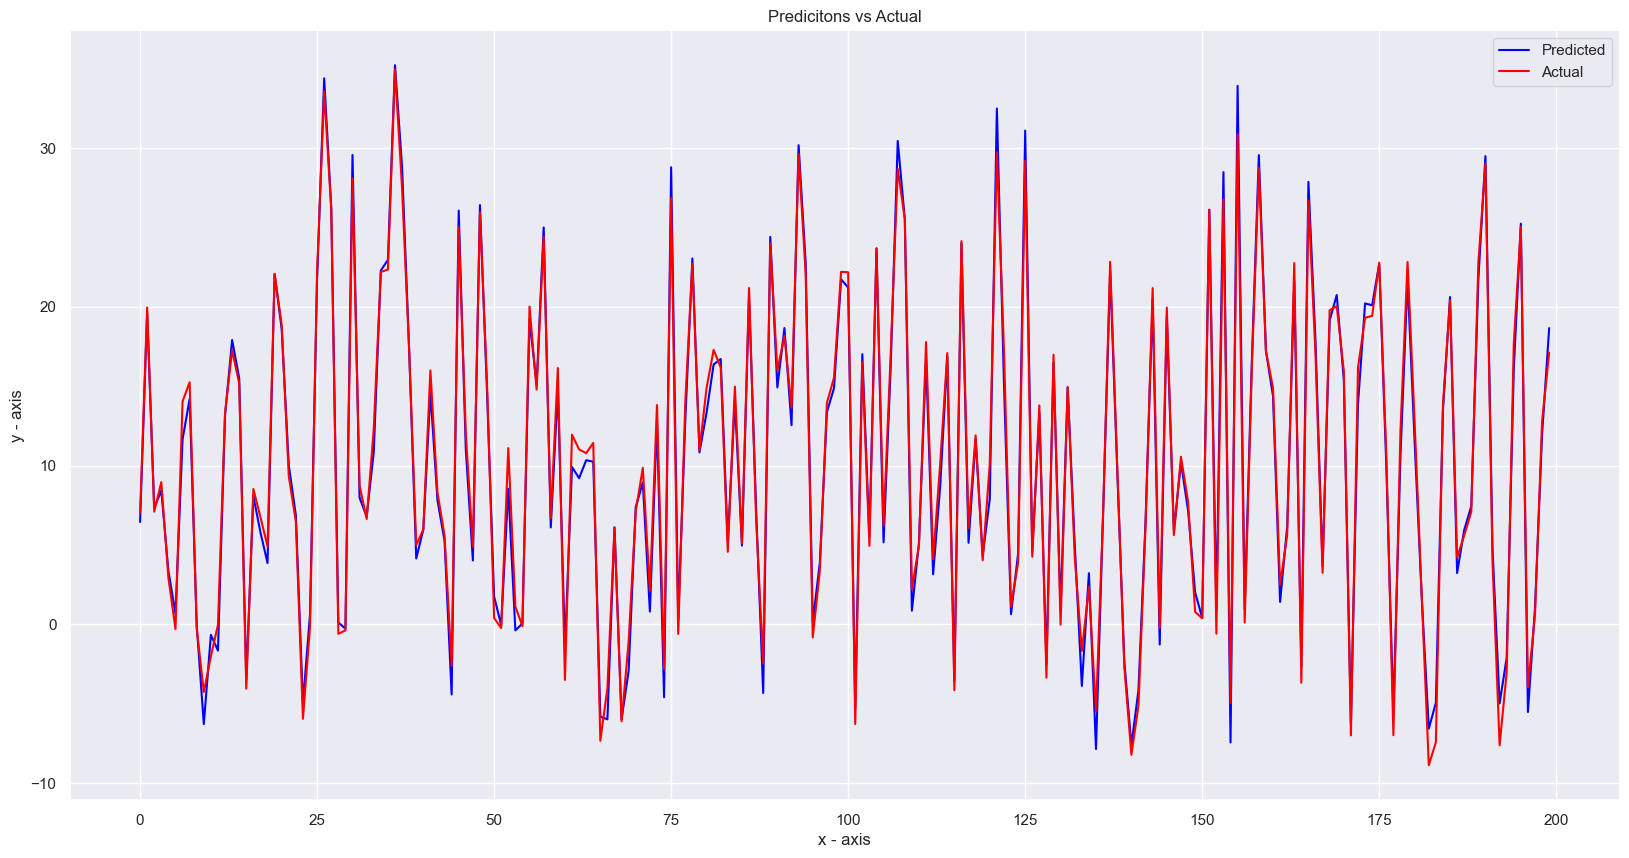

In [119]:
sns.set(rc={'figure.figsize':(20,10)})
plt.plot(y_pred[:200], label='Predicted', color='blue')
plt.plot(list(y_test['Apparent Temperature (C)'][:200]), label='Actual', color='red')
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.title('Predicitons vs Actual')
plt.legend()
plt.show()